**Name:** Mahendra Pratap Singh | **Reg ID:**  GO_STP_7372 | **Intern at:** Goeduhub Technologies | **Decision tree**

#### Importing Libraries

In [10]:
from pandas import*
from numpy import*
import pandas as pd
import numpy as np
from sklearn import*
import seaborn as sns
from sklearn.model_selection import train_test_split

#### Loading the datasets

In [44]:
data = read_csv("train_u6lujuX_CVtuZ9i.csv")
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [45]:
data.shape

(614, 13)

In [46]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Data Preprocessing

In [49]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [50]:
sum(data.isna().sum(axis = 0) > 0)

7

In [51]:
sum(data.isna().sum(axis = 1) > 0)

134

<AxesSubplot:>

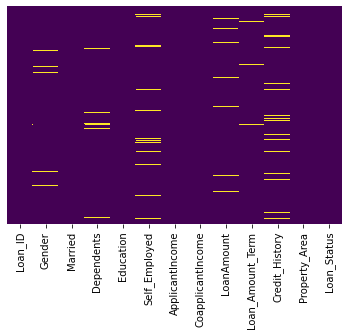

In [52]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [53]:
data = data.fillna(0)

<AxesSubplot:>

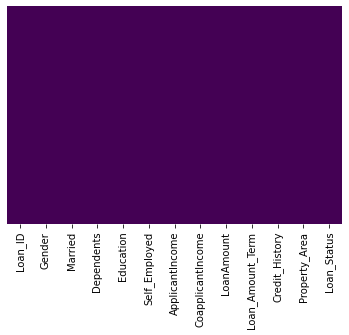

In [54]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [55]:
data = data.drop(columns=['Loan_ID'])

In [58]:
data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [60]:
data.groupby('Loan_Status').count()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,
N,192,192,192,192,192,192,192,192,192,192,192
Y,422,422,422,422,422,422,422,422,422,422,422


In [61]:
df_encoded = get_dummies(data,drop_first=True )
df_encoded.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,0.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,0,1,0,0,0,0


#### Split the dataset

In [62]:
x = df_encoded.drop(columns='Loan_Status_Y')
y = df_encoded['Loan_Status_Y']

In [ ]:
df.groupby('Loan_Status').count()

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state =42)

In [66]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)

In [67]:
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

#### Decision Tree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
#.....................................................
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)

In [69]:
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))

Training Data Set Accuracy:  1.0


In [70]:
print("Training Data F1 Score ", f1_score(y_train,y_pred))

Training Data F1 Score  1.0


In [72]:
print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())

Validation Mean F1 Score:  0.5569061217925768


In [73]:
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Validation Mean Accuracy:  0.6353741496598639


[Text(153.45000000000002, 190.26, 'X[4] <= 0.5\ngini = 0.431\nsamples = 491\nvalue = [154, 337]'),
 Text(83.7, 135.9, 'X[2] <= 428.0\ngini = 0.44\nsamples = 110\nvalue = [74, 36]'),
 Text(55.800000000000004, 81.53999999999999, 'X[0] <= 6366.5\ngini = 0.427\nsamples = 107\nvalue = [74, 33]'),
 Text(27.900000000000002, 27.180000000000007, 'gini = 0.456\nsamples = 91\nvalue = [59, 32]'),
 Text(83.7, 27.180000000000007, 'gini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(223.20000000000002, 135.9, 'X[16] <= 0.5\ngini = 0.332\nsamples = 381\nvalue = [80, 301]'),
 Text(167.4, 81.53999999999999, 'X[3] <= 420.0\ngini = 0.383\nsamples = 229\nvalue = [59, 170]'),
 Text(139.5, 27.180000000000007, 'gini = 0.373\nsamples = 226\nvalue = [56, 170]'),
 Text(195.3, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(279.0, 81.53999999999999, 'X[1] <= 6160.0\ngini = 0.238\nsamples = 152\nvalue = 

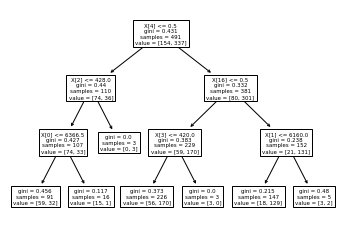

In [74]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)
tree.plot_tree(tree_clf)

In [75]:
text_representation = tree.export_text(tree_clf)
print(text_representation)

|--- feature_4 <= 0.50
|   |--- feature_2 <= 428.00
|   |   |--- feature_0 <= 6366.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  6366.50
|   |   |   |--- class: 0
|   |--- feature_2 >  428.00
|   |   |--- class: 1
|--- feature_4 >  0.50
|   |--- feature_16 <= 0.50
|   |   |--- feature_3 <= 420.00
|   |   |   |--- class: 1
|   |   |--- feature_3 >  420.00
|   |   |   |--- class: 0
|   |--- feature_16 >  0.50
|   |   |--- feature_1 <= 6160.00
|   |   |   |--- class: 1
|   |   |--- feature_1 >  6160.00
|   |   |   |--- class: 0



In [76]:
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.7967479674796748
Test F1 Score:  0.8603351955307263
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,21,17,38
1,8,77,85
All,29,94,123


In [ ]:
plt.figure()
tree.plot_tree(tree_clf,filled=True)  
plt.savefig('tree.jpg',format='jpg',bbox_inches = "tight")